# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

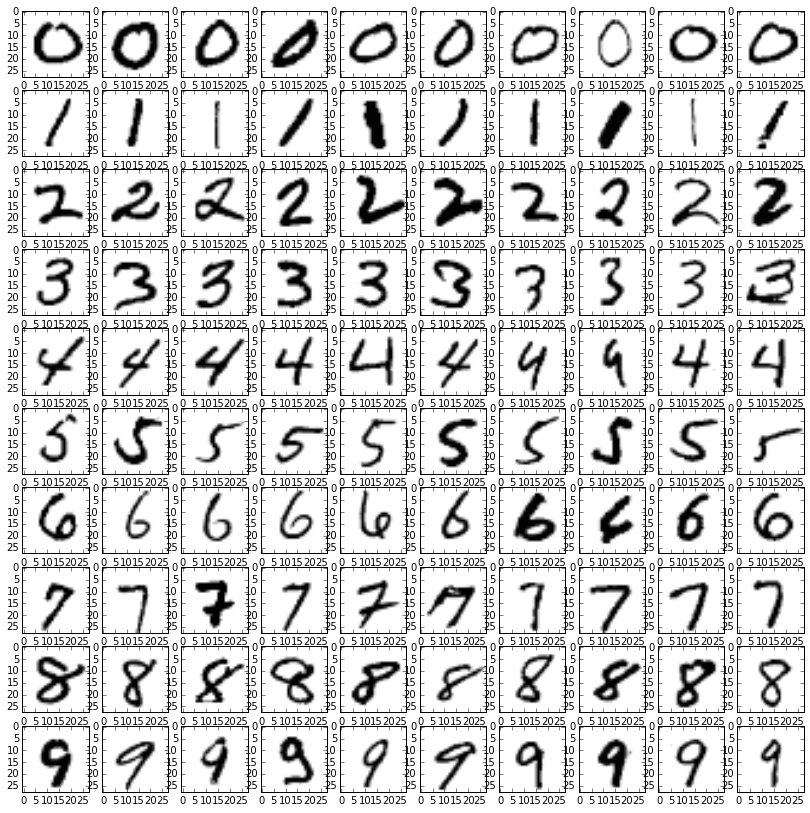

In [3]:
def P1(num_examples=10):

### STUDENT START ###
        
    #first, go through Y to search for num_examples examples for each digit
    digits = np.zeros((10, num_examples)) # to store the index
    how_far = np.zeros(10) # to record how far each digit goes
    total = 0 # a counter so that we can stop when we get num_examples * 10 samples
    
    plt.close('all')        
    plt.rc('lines', c='w')
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 12 and height to 9
    fig_size[0] = 14
    fig_size[1] = 14
    plt.rcParams["figure.figsize"] = fig_size
    for i in range(len(mini_train_labels)): # go for the label list
        d = mini_train_labels[i]
        
        if(total == num_examples * 10): # when we get exact # of samples stop the loop
            break
            
        if(how_far[d] == num_examples): # when we get enough for this particular digit d, we skip to go on with the loop
            continue
            
        digits[d][how_far[d]] = i  # to record where we find the digit
        how_far[d] += 1
        total += 1
    #now that we have all the indexes, we start to plot
    for i in range(10):
        for j in range(num_examples):
            #first load in the one-dimension pattern and reshape it to 2D to print
            plt.subplot(10, 10, i*10 + j + 1)
            plt.imshow(mini_train_data[digits[i][j]].reshape(28, 28), cmap='Greys')    

### STUDENT END ###

P1()

#at one point, I thought, in stead of displaying these 100 28x28 digit images in 10x10 grids, we were asked to display them 
#in 100 10x10 images, so I 'created' the following function to shrink a 28x28 image into a 10x10 image, by first adding
#2 0.0 rows to the top and bottum, and two 0.0 column to the left and right sides, to extend a 28x28 image to a 30x30 one, then
#to make a 10x10 image from this 30x30 one using 3x3 to 1x1 shrink by arithmatically averaging on the non-zero cells.
#it actually worked... though the images showed a lighter shade and is blurrier

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    for n in k_values:
        clf = KNeighborsClassifier(n)
        clf.fit(mini_train_data, mini_train_labels)
        if n == 1:
            print "In the case of k = ", n, ":"
            print classification_report(dev_labels, clf.predict(dev_data))

### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

In the case of k =  1 :
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER:

In the case of n=1, digit 9 has the lowest precision of 0.77.  ALso, in general, '9' and '1' are the hardest class and constantly yields the lowest precisions.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###
    idx = 0;
    for size in train_sizes:
        start = time.time()
        clf = KNeighborsClassifier(1)
        clf.fit(train_data[:size], train_labels[:size])
        accuracies.append(classification_report(dev_labels, clf.predict(dev_data)))
        
        print 'For size = ', size, ', it took ', "%3.3f" % (time.time() - start) , ' seconds.'
        idx += 1
        
    
### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

print

for i in range(len(accuracies)):
    print 'For size = ', train_sizes[i], ', the accuracy is ', accuracies[i]

For size =  100 , it took  0.129  seconds.
For size =  200 , it took  0.250  seconds.
For size =  400 , it took  0.529  seconds.
For size =  800 , it took  1.078  seconds.
For size =  1600 , it took  2.202  seconds.
For size =  3200 , it took  4.435  seconds.
For size =  6400 , it took  9.107  seconds.
For size =  12800 , it took  18.909  seconds.
For size =  25000 , it took  41.427  seconds.

For size =  100 , the accuracy is               precision    recall  f1-score   support

        0.0       0.86      0.95      0.90        99
        1.0       0.60      1.00      0.75       105
        2.0       0.90      0.60      0.72       102
        3.0       0.56      0.70      0.62        86
        4.0       0.92      0.47      0.62       104
        5.0       0.77      0.51      0.61        91
        6.0       0.87      0.86      0.86        98
        7.0       0.70      0.81      0.75       113
        8.0       0.92      0.47      0.62        96
        9.0       0.56      0.79     

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [6]:
def p_real(x):
    return float("%.2f" % x)

def P4():

### STUDENT START ###
#First I will generate the new X's and Y, for which we then run the regression
#here each X has three parameters, precison, recall, and f1
    new_train_X = []
    new_train_Y = []
    for i in range(len(accuracies)):
        h1, h2, h3, pre, rec, f1, tot = accuracies[i].split("\n")[-2].split()
        acc = [float(pre), float(rec), float(f1)]
        print 'For size = ', train_sizes[i], ', the accuracies are:', acc
        new_train_X.append([train_sizes[i]])
        new_train_Y.append(acc)
    regr = LinearRegression()
    regr.fit(new_train_X, new_train_Y)
    
    #the prediction for size 60000
    pre, rec, f1 = regr.predict(60000)[0]
    print "\nThe prediction for when training size = 60000 are: " , [p_real(pre), p_real(rec), p_real(f1)]

### STUDENT END ###

P4()
#the prediction does not make sense, so we should look for a transformation to help the values always within the 100% boundary

def trans(x):
    if(x==1.0):
        return 10000000000.0;
    return (1/(1-x)-1)

def trans_rev(x):
    return (1 - 1/(1+x))


#revision:
print "\nAfter revision, we rerun the whole procedure"
def P4_1():
    new_train_X = []
    new_train_Y = []
    for i in range(len(accuracies)):
        h1, h2, h3, pre, rec, f1, tot = accuracies[i].split("\n")[-2].split()
        print 'For size = ', train_sizes[i], ', the accuracies are:', [float(pre), float(rec), float(f1)]
        acc = [trans(float(pre)), trans(float(rec)), trans(float(f1))]
        print '\t\twhich is transfomred to', [p_real(trans(float(pre))), p_real(trans(float(rec))), p_real(trans(float(f1)))]
        new_train_X.append([train_sizes[i]])
        new_train_Y.append(acc)
    regr = LinearRegression()
    regr.fit(new_train_X, new_train_Y)
    
    #the prediction for size 60000
    pre, rec, f1 = regr.predict([60000])[0]
    print "\nThe prediction for when training size = 60000 are: ", [p_real(trans_rev(pre)), p_real(trans_rev(rec)), p_real(trans_rev(f1))]
    
    #for comparison, I will run an actual 60000 1-NN
    clf = KNeighborsClassifier(1)
    clf.fit(train_data[:60000], train_labels[:60000])
    print "\n" , classification_report(dev_labels, clf.predict(dev_data))
    
P4_1()

For size =  100 , the accuracies are: [0.77, 0.72, 0.71]
For size =  200 , the accuracies are: [0.8, 0.79, 0.78]
For size =  400 , the accuracies are: [0.85, 0.84, 0.84]
For size =  800 , the accuracies are: [0.89, 0.88, 0.88]
For size =  1600 , the accuracies are: [0.91, 0.9, 0.9]
For size =  3200 , the accuracies are: [0.93, 0.93, 0.93]
For size =  6400 , the accuracies are: [0.94, 0.94, 0.94]
For size =  12800 , the accuracies are: [0.96, 0.96, 0.96]
For size =  25000 , the accuracies are: [0.97, 0.97, 0.97]

The prediction for when training size = 60000 are:  [1.21, 1.24, 1.25]

After revision, we rerun the whole procedure
For size =  100 , the accuracies are: [0.77, 0.72, 0.71]
		which is transfomred to [3.35, 2.57, 2.45]
For size =  200 , the accuracies are: [0.8, 0.79, 0.78]
		which is transfomred to [4.0, 3.76, 3.55]
For size =  400 , the accuracies are: [0.85, 0.84, 0.84]
		which is transfomred to [5.67, 5.25, 5.25]
For size =  800 , the accuracies are: [0.89, 0.88, 0.88]
		wh

ANSWER:

[1.21, 1.24, 1.25] are the predicted precision, recall
The problem is obvious the prediction of 1.21, 1.24, and 1.25 do NOT make sense because they are supposed to mean precision, recall or f1 which is at most 100% = 1.

I transformed the original accuracy into 1/(1-x)-1, which, when 0<= x < 1, yields a smooth positive sloped function, and at the same time, when reversed transformed by 1+1/(1+x), yields a y that is approaching but never yields 1.

Afterwards, I got [0.99, 0.99, 0.99] which makes much more sense, I also perform the real test, and found the 60000 1-NN is actually 0.98, 0.98 and 0.98, close enough :)




(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

In [7]:
def P5():

### STUDENT START ###
    clf = KNeighborsClassifier(1)
    clf.fit(mini_train_data, mini_train_labels)
    print "A quick look:\n" , classification_report(dev_labels, clf.predict(dev_data))
    print "\nThe confusion matrix\n", confusion_matrix(dev_labels, clf.predict(dev_data))
    
### STUDENT END ###

P5()

A quick look:
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


The confusion matrix
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   

ANSWER:
    
From the matrix, the most 'confused' pair is (4, 9) then (9, 4), meaning mistaken '4' as '9' or the other way around.  I add the following cell to list a few such 
examples

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

Most confused is to predict  9  when it should be  4

Image being predicted as '9' but is actually '4':



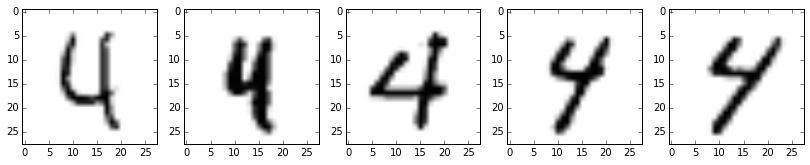

In [8]:
num_egs = 5
idx = 0
egs = []

clf = KNeighborsClassifier(1)
clf.fit(mini_train_data, mini_train_labels)

cm = confusion_matrix(dev_labels, clf.predict(dev_data))
print cm
worst = 0;
true_th, pred_th = 0, 0;

#first find the 'worst' confusion
for i in range(10):
    for j in range(10):
        if((i!=j)& (cm[i][j]> worst)):
            true_th = i
            pred_th = j
            worst = cm[i][j]

print "\nMost confused is to predict ", pred_th, " when it should be ", true_th
        

dev_pred = clf.predict(dev_data)
for i in range(len(dev_labels)):
    if(idx==num_egs):
        break
    if((dev_labels[i] == float(true_th)) & (dev_pred[i]== float(pred_th))):
        egs.append(i)
        idx += 1

print "\nImage being predicted as '9' but is actually '4':\n"
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 14
plt.rcParams["figure.figsize"] = fig_size
plt.close('all')        
plt.rc('lines', c='w')
for i in range(num_egs):
    # Get current size
    plt.subplot(1, num_egs, i+1)
    plt.imshow(dev_data[egs[i]].reshape(28,28), cmap = 'Greys')

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [9]:
def sgb(data):
    nd = np.zeros((len(data), 28*28))
    for i in range(len(data)):
        od = np.zeros((30, 30))
        for j in range(28):
            for k in range(28):
                od[j+1][k+1] = data[i].reshape(28,28)[j][k]
        tmp = np.zeros((28, 28))
        for j in range(28):
            for k in range(28):
                tot = 0.0
                for m in range(3):
                    for n in range(3):
                        tot += od[m+j-1][n+k-1]
                tmp[j,k]=tot/9.0
        nd[i]=tmp.reshape(28*28)
    return(nd)

def P6():

### STUDENT START ###
    #First bench mark none processd
    
    clf = KNeighborsClassifier(1)
    clf.fit(mini_train_data, mini_train_labels)
    print "\nNone proccessed\n" , classification_report(dev_labels, clf.predict(dev_data))
    
    
    #then try process train data only
    clf = KNeighborsClassifier(1)
    clf.fit(sgb(mini_train_data), mini_train_labels)
    print "\nProcess Train only\n" , classification_report(dev_labels, clf.predict(dev_data))
    
    #then try process dev data only
    clf = KNeighborsClassifier(1)
    clf.fit(mini_train_data, mini_train_labels)
    print "\nProcess Dev only\n" , classification_report(dev_labels, clf.predict(sgb(dev_data)))

    #then both dev data only
    clf = KNeighborsClassifier(1)
    clf.fit(sgb(mini_train_data), mini_train_labels)
    print "\nProcess both Train and Dev\n" , classification_report(dev_labels, clf.predict(sgb(dev_data)))

### STUDENT END ###

P6()


None proccessed
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000


Process Train only
             precision    recall  f1-score   support

        0.0       0.95      0.83      0.89        99
        1.0       0.67      0.90      0.77       105
        2.0       0.83      0.89      0.86       102
        3.0       0.65      0.84      0.73        86
        4.0       0.79      0.77      0.78       104
     

ANSWER:

From the performance, we see that, out of the three types, (and wirth repsect the benchmark), only the combined dev and train processing performed slightly better than the no-processing benchmark

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [10]:
t_data = np.zeros((len(mini_train_data), 28*28))
d_data = np.zeros((len(dev_data), 28*28))

def P7():

### STUDENT START ###

#first just the binary

    np.copyto(t_data, mini_train_data)
    np.copyto(d_data, dev_data)
    
    for i in range(len(t_data)):
        for j in range(28*28):
            t_data[i][j] = 0 if mini_train_data[i][j] <= (1.0/2.0) else 1
            
    for i in range(len(d_data)):
        for j in range(28*28):
            d_data[i][j] = 0 if dev_data[i][j] <= (1.0/2.0) else 1
            
    bnb = BernoulliNB(1.0)
    y_pred = bnb.fit(t_data, mini_train_labels).predict(d_data)
    print("Accuracy rate %.3f" % (float((dev_labels == y_pred).sum())/float(d_data.shape[0])))
    print("Number of successfully predicted points out of a total %d points : %d" % (d_data.shape[0],(dev_labels == y_pred).sum()))
   
    np.copyto(t_data, mini_train_data)
    np.copyto(d_data, dev_data)
    
    for i in range(len(t_data)):
        for j in range(28*28):
            x = mini_train_data[i][j] 
            t_data[i][j] = 0 if x <= (1/3.0) else ( 1 if x <=(2/3.0) else 2)

    for i in range(len(d_data)):
        for j in range(28*28):
            x = dev_data[i][j] 
            d_data[i][j] = 0 if x <= (1/3.0)else ( 1 if x <=(2/3.0) else 2)

    mnb = MultinomialNB()
    y_pred = mnb.fit(t_data, mini_train_labels).predict(d_data)
    print("Accuracy rate %.3f" % (float((dev_labels == y_pred).sum())/float(d_data.shape[0])))
    print("Number of successfully predicted points out of a total %d points : %d" % (d_data.shape[0],(dev_labels == y_pred).sum()))


    
### STUDENT END ###

P7()

Accuracy rate 0.815
Number of successfully predicted points out of a total 1000 points : 815
Accuracy rate 0.802
Number of successfully predicted points out of a total 1000 points : 802


ANSWER: Not really, the accuracy has actually decreased.  Perhaps we really do not know the best way to split the sheds into 3 levels than 2 level.  That is, we are making the task unnecerssarily more complex, running the risk of overfitting, especially for shorter document like mini_train_data

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [11]:
from sklearn.cross_validation import train_test_split
            
for i in range(len(t_data)):
    for j in range(28*28):
        t_data[i][j] = 0 if mini_train_data[i][j] <= (1.0/2.0) else 1

def P8(alphas):

    ### STUDENT START ###
    # To apply an classifier on this data, we need to flatten the image, to
    # turn the data in a (samples, feature) matrix:


    # Split the dataset in two equal parts
    first_data, second_data, first_labels, second_labels = train_test_split(
        t_data, mini_train_labels, test_size=0.5, random_state=0)
    clf = GridSearchCV(BernoulliNB(), alphas)
    clf.fit(first_data, first_labels)
    #print (clf.predict(second_data)==second_labels).sum()/500.0
    #print second_labels
    #print clf.score(clf.predict(second_data), second_labels)
    #clf.predict(second_data)
    return(clf)


### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print nb.best_params_

{'alpha': 0.0001}


C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:707: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc)
C:\Anaconda\lib\site-packages\sklearn\naive_bayes.py:726: RuntimeWarning: divide by zero encountered in log
  neg_prob = np.log(1 - np.exp(self.feature_log_prob_))


In [84]:
print nb.best_params_

#for alpha = 0.0

first_data, second_data, first_labels, second_labels = train_test_split(
    t_data, mini_train_labels, test_size=0.5, random_state=0)
clf = BernoulliNB(0.000)
clf.fit(first_data, first_labels)
print (clf.predict(second_data)==second_labels).sum()/500.0


{'alpha': 0.0001}
0.09


ANSWER: the best value for alpha is 0.0001. However, when alpha = 0.0, the accuracy dropped to 0.09, which is totally unexpected because it is so closer to 0.0001 than any other tested value.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [38]:
#print mini_train_data[10]
def P9():

### STUDENT END ###
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    y_pred = gnb.predict(dev_data)
    print("Accuracy: %.3f" % (float((dev_labels == y_pred).sum())/float(dev_data.shape[0])))
    return gnb

### STUDENT END ###

gnb = P9()

Accuracy: 0.627


ANSWER: We got a not impressive 0.627,

I will take the hint by testing different thea_ and _sigma

In [49]:
#print gnb.sigma_.shape
gnb.sigma_ = np.zeros((10, 784))+0.00000000001
#gnb.thea_ = np.zeros((10, 784))+0.5
#print gnb.sigma_
print dev_data.shape
y_pred = gnb.predict(d_data)
#print gnb.sigma_
print("Accuracy: %.3f" % (float((dev_labels == y_pred).sum())/float(dev_data.shape[0])))



(1000L, 784L)
Accuracy: 0.769


(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

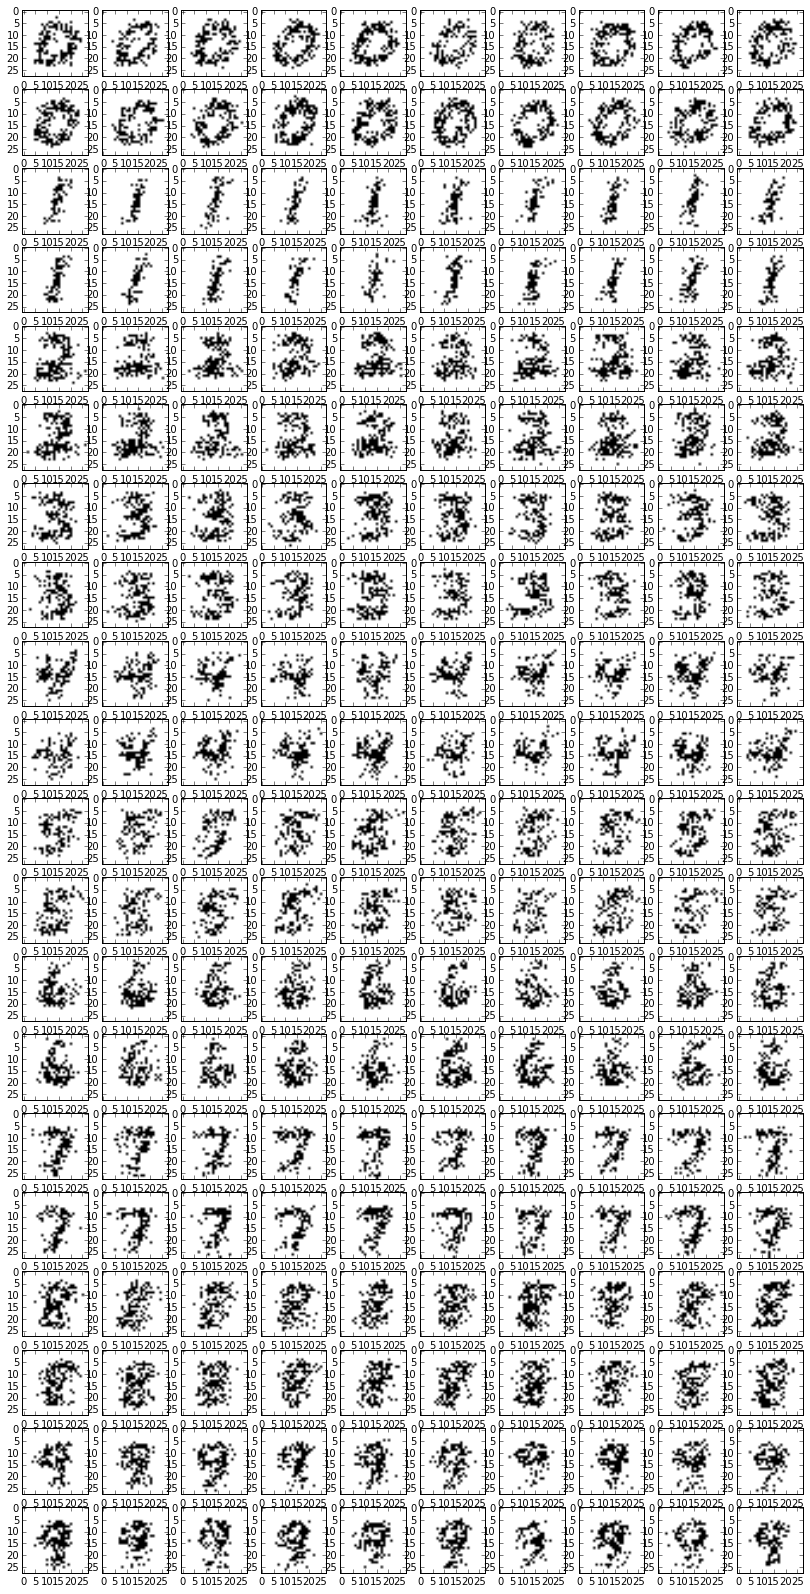

In [78]:
def P10(num_examples):

### STUDENT START ###
    plt.close('all')        
    plt.rc('lines', c='w')
    # Get current size
    fig_size = plt.rcParams["figure.figsize"]

    # Set figure width to 14 and height to 28
    fig_size[0] = 14
    fig_size[1] = 28
    plt.rcParams["figure.figsize"] = fig_size
    
    #First run the BernoulliNB
    bnb = BernoulliNB(0.0001)
    bnb.fit(t_data, mini_train_labels)
    
    dig = np.zeros((200,28 * 28))

    for i in range(10):
        for j in range(num_examples):
            #first load in the one-dimension pattern and reshape it to 2D to print
            for k in range(28*28):
                dig[i*num_examples+j][k] = np.random.rand()<=np.exp(bnb.feature_log_prob_[i][k])
            plt.subplot(20, 10, i*num_examples + j + 1)
            plt.imshow(dig[i*num_examples+j].reshape(28,28), cmap='Greys')    


### STUDENT END ###

P10(20)

ANSWER:

I followed the hint and used the probability we got from the BernoulliNB model and 'predicted' the digit pattern by comparing the probability per pixel with uniformed random number generator.  The result is far from perfect, especially for the 'confused' digits.  The main reason was because we are assuming each pixel is independent from each other, which is hardly the case in the handwritten digit recognition.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [98]:
def P11(buckets, correct, total):
    
### STUDENT START ###
    bnb = BernoulliNB(1)
    bnb.fit(t_data, mini_train_labels)
    
    y_pred = bnb.predict_proba(dev_data)

    for i in range(len(y_pred)):
        m = np.max(y_pred[i])
        d = 0
        for n in y_pred[i]:
            if m == n:
                break
            d += 1
        cat = 0
        for b in buckets:
            if m <= b:
                break
            cat = cat + 1
        total[cat] += 1
        if d == int(dev_labels[i]):
            correct[cat] += 1
            
                

                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i]*1.0 / total[i]
        print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.9000000000000    total =  31    accuracy = 0.387
p(pred) <= 0.9990000000000    total =  76    accuracy = 0.447
p(pred) <= 0.9999900000000    total =  63    accuracy = 0.508
p(pred) <= 0.9999999000000    total =  88    accuracy = 0.659
p(pred) <= 0.9999999990000    total =  62    accuracy = 0.677
p(pred) <= 0.9999999999900    total =  55    accuracy = 0.709
p(pred) <= 0.9999999999999    total =  59    accuracy = 0.864
p(pred) <= 1.0000000000000    total = 566    accuracy = 0.933


ANSWER:

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
def P12():

### STUDENT START ###


### STUDENT END ###

P12()